In [88]:
import mysql.connector as cnt
import matplotlib.pyplot as plt
import numpy as np
from dateutil import parser
import pandas as pd

In [89]:
DBnetflix= cnt.connect(
host='localhost', # arba 'localhost', arba '127.0.0.1'
user = 'root',
password='ragana1989',
port=3317, #arba kitas

)

c=DBnetflix.cursor()

In [90]:
netflix_titles=pd.read_csv("netflix_titles.csv", parse_dates=["date_added"])

In [91]:
nt=netflix_titles

In [92]:
nt

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [93]:
nt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [94]:
nm=nt[nt["type"]=="Movie"].value_counts()
ns=nt[nt["type"]=="TV Show"].value_counts()
s=nt["show_id"].value_counts()
r=nt["rating"]
z=(nt["duration"]>"9") & (nt["type"]=="TV Show")
nt["release_year"]=nt["release_year"].astype(int)

<AxesSubplot: title={'center': 'NETFLIX TITLES BY TYPE'}, ylabel='type'>

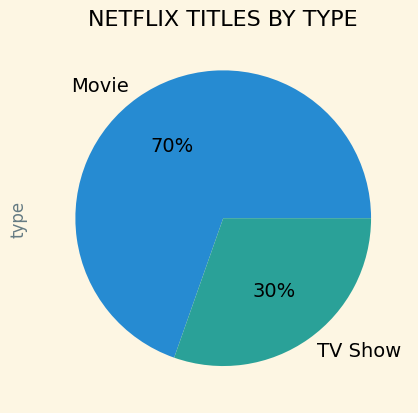

In [95]:
nt.type.value_counts().plot(kind="pie", autopct='%1.0f%%', title="NETFLIX TITLES BY TYPE", fontsize=14)

('netflix_titles',)


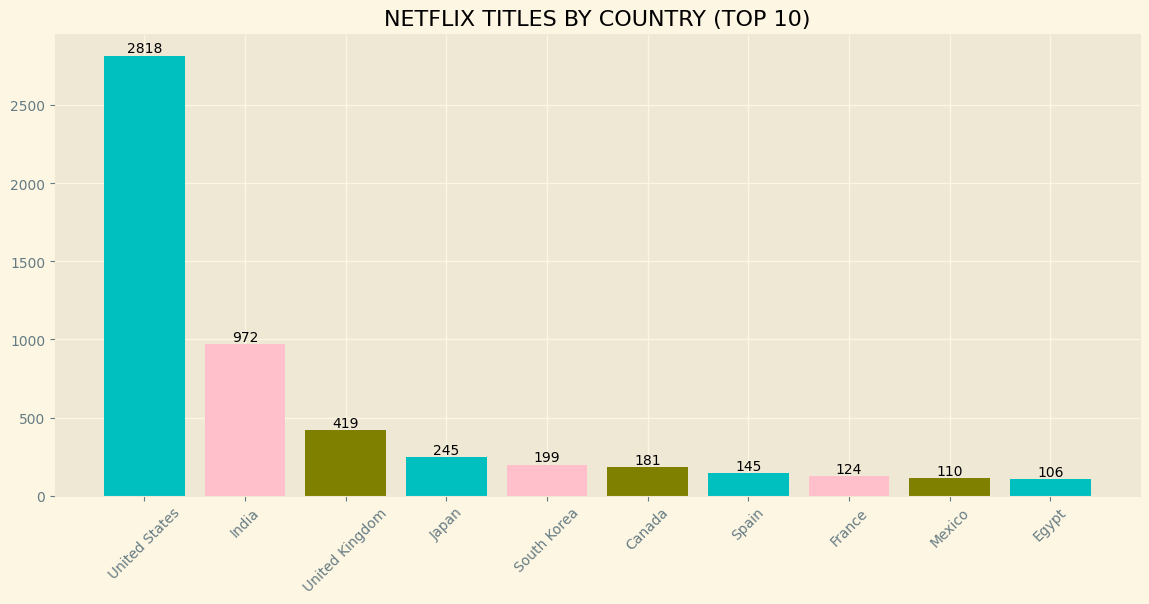

In [96]:
c.execute('use netflix')
c.execute('show tables')
ats= c.fetchall()
print(ats[0])

sql = """SELECT count(show_id) as A, country FROM netflix.netflix_titles
group by country
having count(show_id)<>831 and A>105
order by A desc"""

c.execute(sql)
ats = c.fetchall()
# print(ats)

kiekis = []
salys = []

x=np.arange(1, len(ats)+1)

for eilute in ats:
    kiekis.append(eilute[0])
    salys.append(eilute[1])

fig,ax=plt.subplots()
ax.set_title('NETFLIX TITLES BY COUNTRY (TOP 10)', fontsize=16)
B=ax.bar(x, kiekis, color=[ "c", "pink","olive"])
ax.set_xticks(x)
ax.set_xticklabels(salys, rotation=45)
fig.set_size_inches (14,6)
ax.bar_label (B)
plt.style.use('Solarize_Light2')
plt.show()


C:\Users\Namai\AppData\Local\Temp\ipykernel_20144\2526602143.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  A=nt["release_year"].value_counts()[:10]


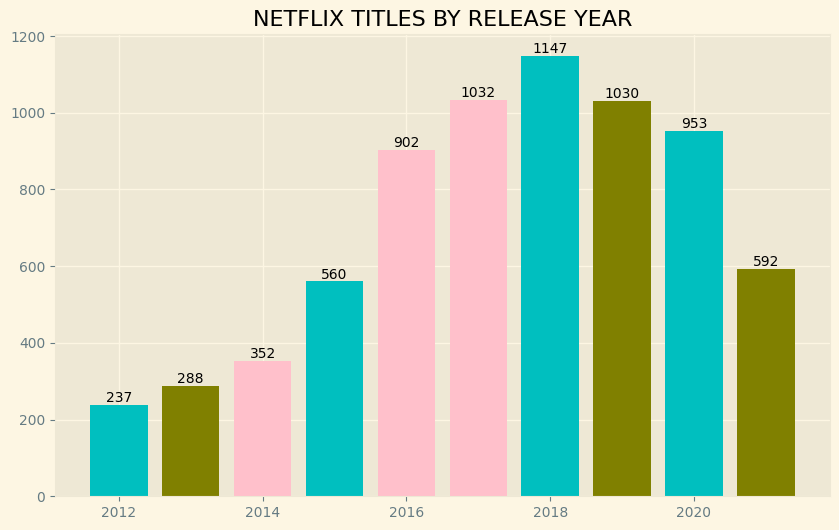

In [97]:
A=nt["release_year"].value_counts()[:10]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('NETFLIX TITLES BY RELEASE YEAR', fontsize=16)
B=ax.bar(a.index, a.values, color=[ "c", "pink","olive"])
ax.bar_label (B)
plt.style.use('Solarize_Light2')
plt.show()

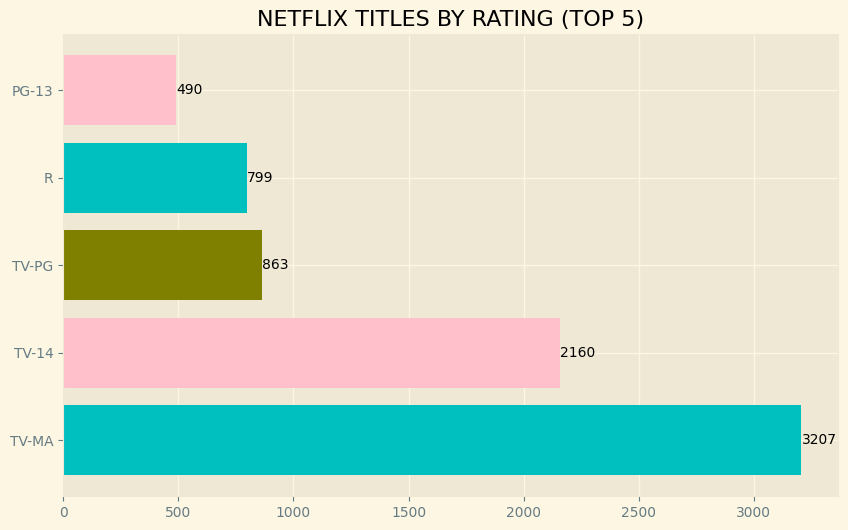

In [98]:
nt_c = nt['rating'].value_counts()[["TV-MA", "TV-14", "TV-PG", "R", "PG-13"]]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('NETFLIX TITLES BY RATING (TOP 5)', fontsize=16)
B=ax.barh(nt_c.index, nt_c.values, color=[ "c", "pink","olive"])
ax.bar_label (B)
plt.style.use('Solarize_Light2')
plt.show()

('netflix_titles',)


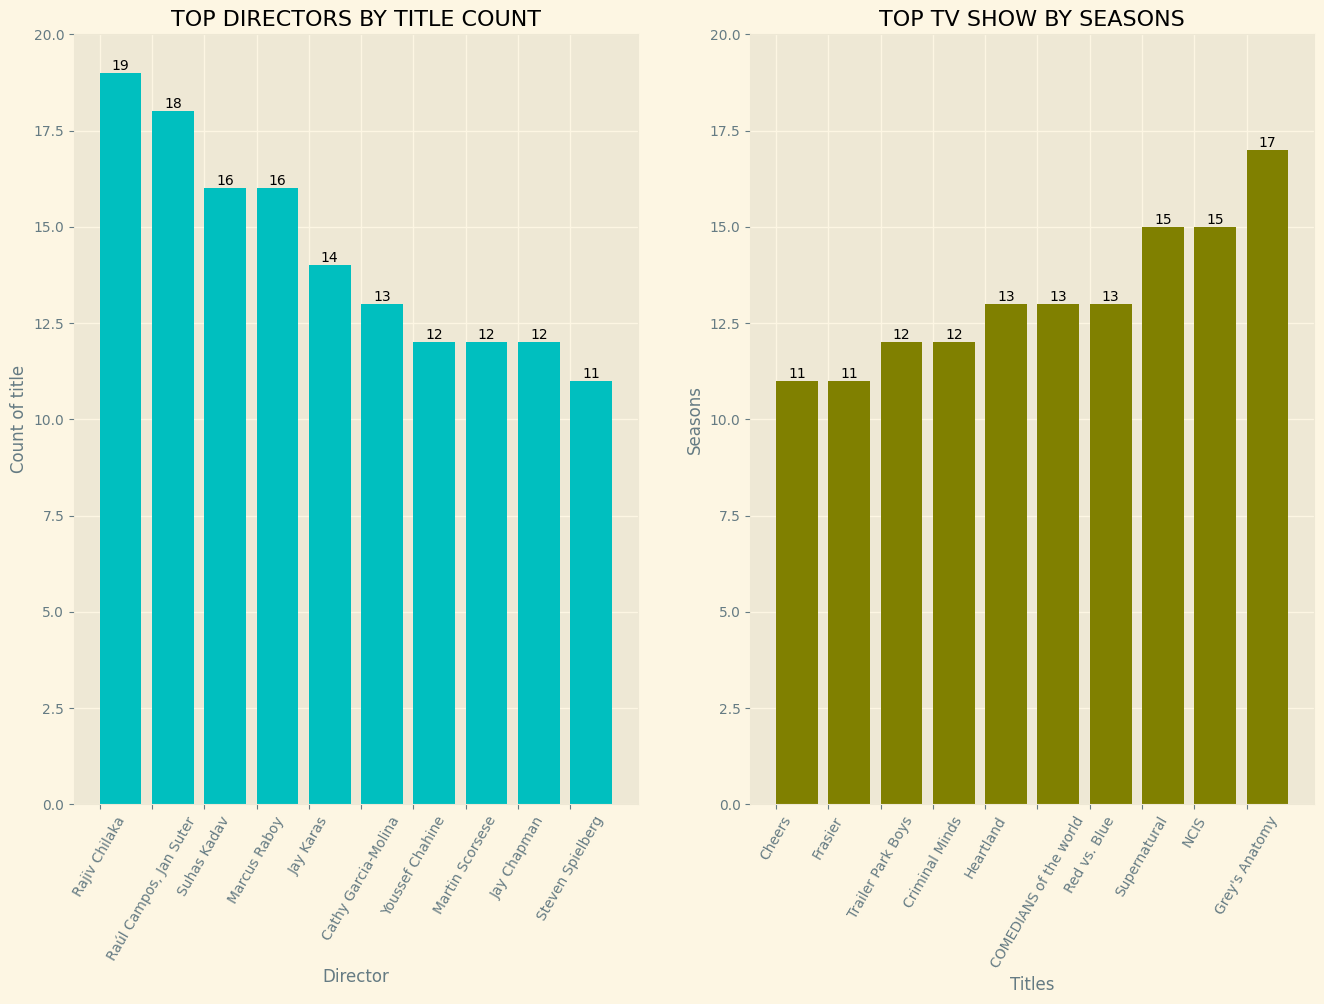

In [99]:
c.execute('use netflix')
c.execute('show tables')
ats= c.fetchall()
print(ats[0])

sql = """SELECT director, count(show_id) FROM netflix.netflix_titles
group by director 
having count(show_id)<100
order by count(show_id) desc
limit 10"""

c.execute(sql)
ats = c.fetchall()
#print(ats)

kiekis=[]
rezis=[]
for i in ats:
    rezis.append((i[0]))
    kiekis.append(int(i[1]))

sql = """SELECT title, duration FROM netflix.netflix_titles where type="Tv Show" and duration>10 order by duration"""
c.execute(sql)
ats = c.fetchall()
#print(ats)

dur=[]
tit=[]
for i in ats:
    tit.append((i[0]))
    dur.append(int(i[1][0:2]))

x = np.arange(1, len(ats)+1)
w = 0.8
fig, ax = plt.subplots(1,2)


P=ax[0].bar(x+w/2, kiekis, width=w, color=[ "c"])
B=ax[1].bar(x+w/2, dur, width=w, color=[ "olive"])


ax[0].set_title("TOP DIRECTORS BY TITLE COUNT")
ax[1].set_title('TOP TV SHOW BY SEASONS')
ax[0].set_ylabel('Count of title')
ax[1].set_ylabel('Seasons')
ax[0].set_xlabel("Director")
ax[1].set_xlabel("Titles")


ax[0].set_xticks(x)
ax[0].set_xticklabels(rezis, rotation=60)
ax[1].set_xticks(x)
ax[1].set_xticklabels(tit, rotation=60)
ax[1].bar_label (B)
ax[0].bar_label (P)
ax[0].set_ylim(0,20)
ax[1].set_ylim(0,20)
fig.set_size_inches(12,8)
ax[0].set_ylim(0,20)
fig.set_size_inches(16,10)
plt.show()